In [95]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
# # the data, split between train and test sets
# mnist_df = mnist.load_data()

In [97]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [98]:
x_train.shape

(60000, 28, 28)

In [99]:
x_train.dtype

dtype('uint8')

# EDA

2


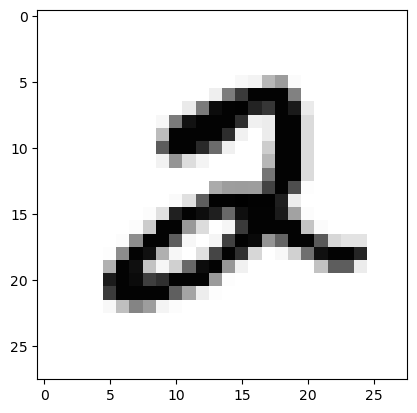

In [100]:
print(y_train[5])
plt.imshow(x_train[5], cmap='Greys')

In [101]:

print('X_train shape:', x_train.shape)
#print(x_valid.shape[0], 'validation samples')
print('X_test samples', x_test.shape)
print('Y_train samples', y_train.shape)
print('Y_test samples', y_test.shape)

X_train shape: (60000, 28, 28)
X_test samples (10000, 28, 28)
Y_train samples (60000,)
Y_test samples (10000,)


In [102]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
input_tensor_shape = (x_test.shape[1], x_test.shape[2], 1)

input_shape = x_train.shape

print("Input shape: {}".format(input_shape))
print("Input tensor shape: {}".format(input_tensor_shape))


Input shape: (60000, 28, 28, 1)
Input tensor shape: (28, 28, 1)


In [103]:
# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# input_shape = (28, 28, 1)

# print('x_train shape', x_train.shape)

In [104]:
# Normalize the pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# print the final input shape
print("Train matrix shape", x_train.shape)
print("Test matrix shape", x_test.shape)

Train matrix shape (60000, 28, 28, 1)
Test matrix shape (10000, 28, 28, 1)


In [105]:
# convert class vectors to binary class matrices
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print("Shape after one-hot encoding: ", y_train.shape)


Shape after one-hot encoding:  (60000, 10)


In [106]:
# creating validation set
# scaling features to 0-1 

# x_valid, x_train = x_train[:5000] / 255.0, x_train_full[5000:] / 255.0
# y_valid, y_train = y_train[:5000], y_train_full[5000:]

In [107]:
x_train.dtype

dtype('float64')

In [108]:
batch_size = 128
epochs = 10

In [109]:
# building network with sequential model

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_tensor_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())    # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [110]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [111]:

# Train the model
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          #validation_data=(x_valid, y_valid)
          validation_data=(x_test, y_test))


Epoch 1/10
469/469 [==============================] - 15s 29ms/step - loss: 0.4385 - accuracy: 0.8677 - val_loss: 0.0826 - val_accuracy: 0.9743
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1358 - accuracy: 0.9641 - val_loss: 0.0589 - val_accuracy: 0.9826
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0968 - accuracy: 0.9748 - val_loss: 0.0518 - val_accuracy: 0.9853
Epoch 4/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0797 - accuracy: 0.9795 - val_loss: 0.0436 - val_accuracy: 0.9860
Epoch 5/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0654 - accuracy: 0.9819 - val_loss: 0.0461 - val_accuracy: 0.9870
Epoch 6/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0560 - accuracy: 0.9851 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 7/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0492 - accuracy: 0.9866 - val_loss: 0.0423 - val_accuracy:

In [112]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dense_9 (Dense)             (None, 128)               589952    
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                      

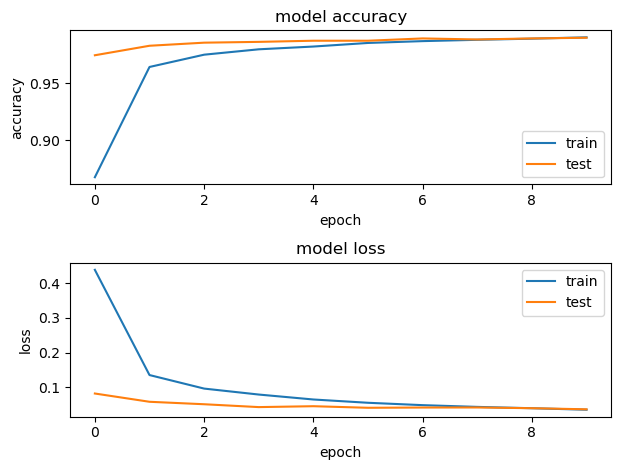

In [113]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [114]:

res = model.evaluate(x_test, y_test)
print("Model has an accuracy of {0:.2f}%".format(res[1] * 100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9896
Model has an accuracy of 98.96%


In [115]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Test loss: 0.03718864917755127
Test accuracy: 0.9896000027656555
Saving the model as mnist.h5


In [126]:
import numpy as np
predictions = np.argmax(model.predict(x_test), axis = 1)
predictions = predictions.flatten()
print(predictions.shape)
predictions

313/313 [==============================] - 1s 4ms/step
(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)